# VGGCIFAR
Classification of Cifar-10 dataset using VGG-like Convolutional Neural Network

## 0. Preparation

In [1]:
# import modules
import matplotlib.pyplot as plt
import os

from keras.datasets import cifar10
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils, plot_model

from matplotlib.ticker import MultipleLocator

from sklearn.model_selection import train_test_split

c:\users\arata\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# consts
NUM_CLASSES = 10
BATCH_SIZE = 200

In [3]:
# plot function
def plot_history(history):
    # plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    plt.show()
    
    # plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(20))
    plt.show() 

## 1. Preprocessing
- Augment data with zca whitening

In [4]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [5]:
# split data into training and valuation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, 
    y_train, 
    test_size = 0.1,
    train_size=0.9, 
    random_state=42,
    shuffle=True
)

In [6]:
# data augmentation & normalization

#training data
trainGenerator = ImageDataGenerator(
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

trainGenerator.fit(x_train)

# valuation data
valGenerator = ImageDataGenerator(
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valGenerator.fit(x_val)

## 2. Model Definition
- Define deep CNN model like VGG
- Adopt Batch Normalization & Dropout

In [7]:
# definition
model = Sequential([
    Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dropout(0.25),
    Dense(4*4*256),
    Activation('relu'),
    
    Dropout(0.25),
    Dense(1024),
    Activation('relu'),
    
    
    Dense(NUM_CLASSES),
    Activation('softmax')
])

## 3. Learning
- adopt Adam as optimizer

In [8]:
# optimizer
optimizer = Adam()

In [9]:
# compile
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Epoch
EPOCHS = 100

In [11]:
# learning
history = model.fit_generator(
    trainGenerator.flow(x_train, y_train, BATCH_SIZE),
    epochs=EPOCHS,
    verbose=1,
    #callbacks=[earlyStopping],
    validation_data=valGenerator.flow(x_val, y_val, BATCH_SIZE)
)


Epoch 1/100
225/225 [==============================] - 139s 617ms/step - loss: 2.8036 - acc: 0.1392 - val_loss: 2.2469 - val_acc: 0.1916
Epoch 2/100
225/225 [==============================] - 132s 588ms/step - loss: 1.8341 - acc: 0.2989 - val_loss: 2.7606 - val_acc: 0.1758
Epoch 3/100
225/225 [==============================] - 135s 600ms/step - loss: 1.5558 - acc: 0.4127 - val_loss: 2.6001 - val_acc: 0.2214
Epoch 4/100
225/225 [==============================] - 138s 615ms/step - loss: 1.3512 - acc: 0.5000 - val_loss: 2.1359 - val_acc: 0.3310
Epoch 5/100
225/225 [==============================] - 138s 613ms/step - loss: 1.2136 - acc: 0.5624 - val_loss: 1.8806 - val_acc: 0.3952
Epoch 6/100
225/225 [==============================] - 138s 613ms/step - loss: 1.0809 - acc: 0.6163 - val_loss: 2.5209 - val_acc: 0.3706
Epoch 7/100
225/225 [==============================] - 137s 611ms/step - loss: 0.9768 - acc: 0.6560 - val_loss: 1.4622 - val_acc: 0.5326
Epoch 8/100
225/225 [====================

225/225 [==============================] - 138s 614ms/step - loss: 0.2383 - acc: 0.9193 - val_loss: 1.0446 - val_acc: 0.7260
Epoch 61/100
225/225 [==============================] - 138s 613ms/step - loss: 0.2308 - acc: 0.9208 - val_loss: 0.7781 - val_acc: 0.7810
Epoch 62/100
225/225 [==============================] - 137s 610ms/step - loss: 0.2299 - acc: 0.9205 - val_loss: 0.8659 - val_acc: 0.7572
Epoch 63/100
225/225 [==============================] - 138s 611ms/step - loss: 0.2297 - acc: 0.9210 - val_loss: 0.8088 - val_acc: 0.7654
Epoch 64/100
225/225 [==============================] - 138s 613ms/step - loss: 0.2230 - acc: 0.9232 - val_loss: 1.0802 - val_acc: 0.7336
Epoch 65/100
225/225 [==============================] - 137s 610ms/step - loss: 0.2216 - acc: 0.9246 - val_loss: 0.8265 - val_acc: 0.7724
Epoch 66/100
225/225 [==============================] - 137s 609ms/step - loss: 0.2202 - acc: 0.9243 - val_loss: 0.8100 - val_acc: 0.7712
Epoch 67/100
225/225 [=========================

## 4. Evaluation
- Plot accuracy & loss of both test data and validation data

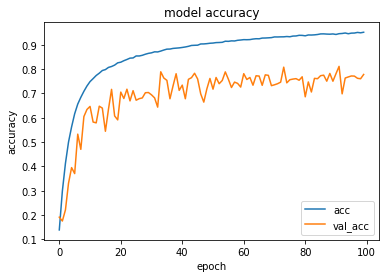

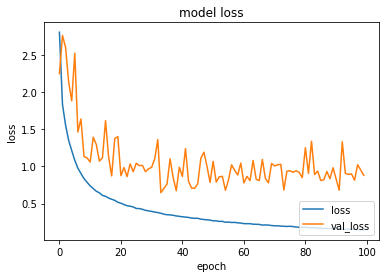

In [12]:
# plot accuracy & loss
plot_history(history)

In [13]:
# visualize model
plot_model(model, to_file="./Resources/model.png", show_shapes=True)

# 5. Save
- Save model architecture and weight

In [14]:
# save model & weight
json_string = model.to_json()
open('./Resources/model.json', 'w').write(json_string)

model.save_weights('./Resources/model_weights.hdf5')